Initial exploratory analysis on hospital records concerning coronary disease and their bio indicators


Import Relevant Modules

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import logging
import seaborn as sns
import numpy as np
import sys

In [18]:
logging.basicConfig(
    filename='app.log',         # File to write logs
    filemode='a',               # Mode: 'a' for append, 'w' for overwrite
    level=logging.DEBUG,        # Minimum level to log (DEBUG, INFO, WARNING, ERROR, CRITICAL)
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'  # Log format
)

In [19]:
"""\
    Load csv file from folder and convert to a dataframe for easy manipulation with pandas
    Take first glimpse of the data to see what the columns are and what type of values are in those columns
    302nd row of the ca column shows a missing values represented as '?', Further investigation to see what other columns have missing values represented as such"""

heart_data_df = pd.read_csv("..\\Data\\heart_data.csv")
heart_data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


The .info module shows that they are no non null values in the data but the type for ca and thal need to be checked since the requirement stipulates they are supposed to be of the numeric type.

In [20]:
"""\
    Get column data of my dataframe. Gives a peek at what columns have null values and the various datatypes of the columns"""

heart_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [21]:
"""\
    Getting the size of my dataframe ie. rows by columns"""
heart_data_df.shape
logging.info(f"Number of rows by column of df: {heart_data_df.shape}")

In [22]:
"""\
    Missing values are inputed as '?' in columns 'thal' and 'ca' """
object_type_features = heart_data_df.select_dtypes(include='object').columns
print(object_type_features)

for col in object_type_features:
    print (heart_data_df[col].unique())
    logging.info(f"Unique values of {col}: {heart_data_df[col].unique()}")

Index(['ca', 'thal'], dtype='object')
['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [23]:
"""Normalizing by encoding 3.0, 6.0, 7.0 to 1.0, 2.0 and 3.0 respectively because the requirement document allocates thal as categorical hence 3,6,7 does not make sense"""

heart_data_df['thal'].replace({'3.0': '1.0', '6.0': '2.0', '7.0': '3.0'}, inplace=True)
heart_data_df['thal'].unique()

C:\Users\EbenezerQuayson\AppData\Local\Temp\ipykernel_16224\3533852148.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data_df['thal'].replace({'3.0': '1.0', '6.0': '2.0', '7.0': '3.0'}, inplace=True)


array(['2.0', '1.0', '3.0', '?'], dtype=object)

In [24]:
"""\
    np.nan iterates true the dataframe a replaces all '?' with Nan
    This prep columns for imputation/ missing values can now be filled in with values that seek to mirror the original values"""

heart_data_df['thal'].replace('?', np.nan, inplace=True)
heart_data_df['ca'].replace('?', np.nan, inplace=True)
heart_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             299 non-null    object 
 12  thal           301 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


C:\Users\EbenezerQuayson\AppData\Local\Temp\ipykernel_16224\4075860227.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data_df['ca'].replace('?', np.nan, inplace=True)


In [25]:
"""\
    Uncomment if there this notebook will be used in an automated pipeline
    Zero Duplicates in data
"""
print(heart_data_df.duplicated().sum())
#heart_data_df.drop_duplicates(inplace=True)


0


In [26]:
"""\
    Convert 'thal' and 'ca' columns to float type"""
heart_data_df = heart_data_df.astype({'thal': float, 'ca': float})
heart_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             299 non-null    float64
 12  thal           301 non-null    float64
 13  heart_disease  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [27]:
"""\
    Summary of numerical data before imputation.
    It includes the measures of central tendancy and a measure of dispersion.
    This shows by rows and columns the general trends of our data
    Special emphasis is paid to the standard deviation(std) of the columns that will be affected by imputation"""

heart_data_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,1.837209,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.957468,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,3.000000,4.000000


In [28]:
"""\
    Defining values for simple imputation
    The percentage of missing values for 'ca' columns is 1.3% and that for the 'thal' column is 0.66% which falls below the 5% percent treshold
    Simple imputation with measures of central tendancy are advisable because it will not reduce variation too much"""

mode_for_thal = heart_data_df['thal'].mode()[0]
median_for_ca = heart_data_df['ca'].median()

In [29]:
"""\
    Simple imputation is done for the two columns this returns a dataframe where all Nan/Null values are replaced with the mode for 'thal' column
    and the median for 'ca' column
    Returns a modified heart_data_df where the Null/Nan values are replaced with the mode and mean of 'ca' and 'thal respectively'
    """
heart_data_df.fillna({'thal': mode_for_thal, 'ca': median_for_ca}, inplace=True)

In [30]:
"""\
    Summary of the numerical features after imputation.
    There was a change in variation in 'ca' whose standard deviation reduced from 0.937438 to 0.934375(difference of: 0.003063) and 'ca' whose standard deviation reduced from 1.939706 to 1.938383(difference of: .001323) which are miniscule changes"""

heart_data_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,1.831683,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,3.000000,4.000000


In [31]:
"""\
    Encoding columns defined in requirement document as category"""
heart_data_df = heart_data_df.astype({'cp': 'category', 'sex': 'category', 'restecg': 'category', 'exang': 'category', 'slope': 'category', 'thal': 'category'})

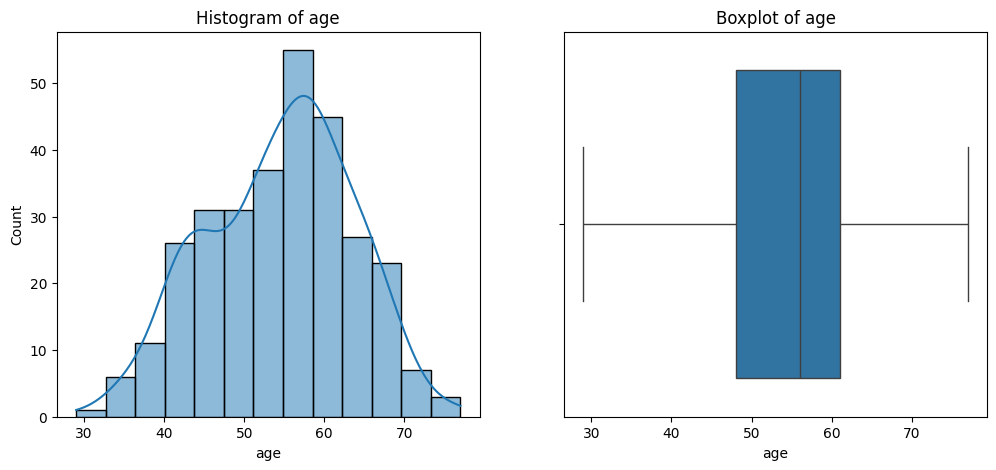

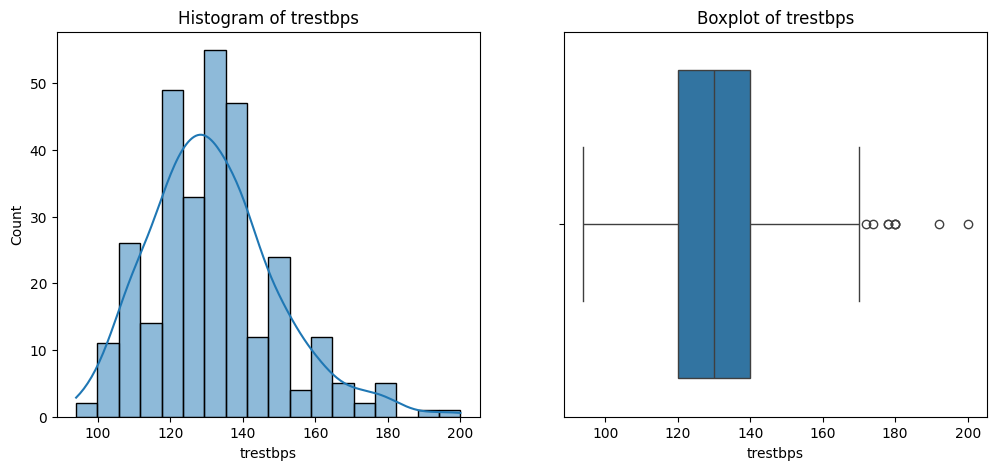

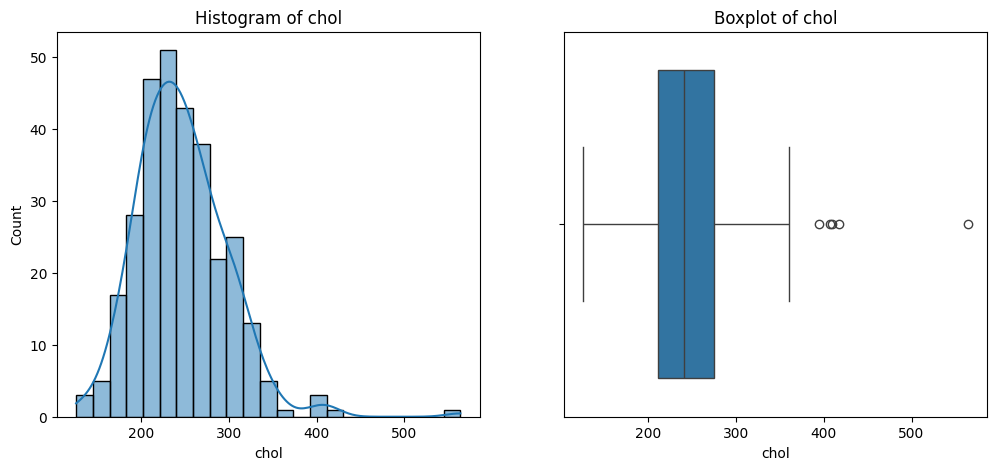

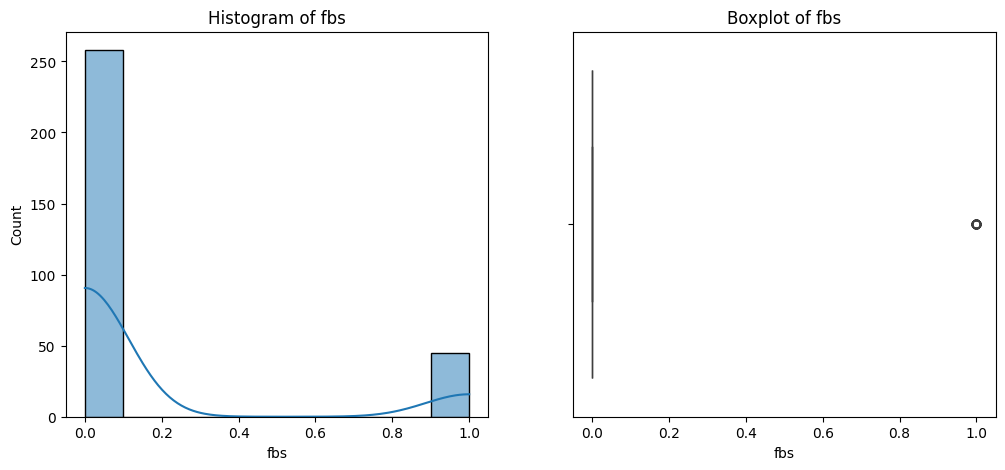

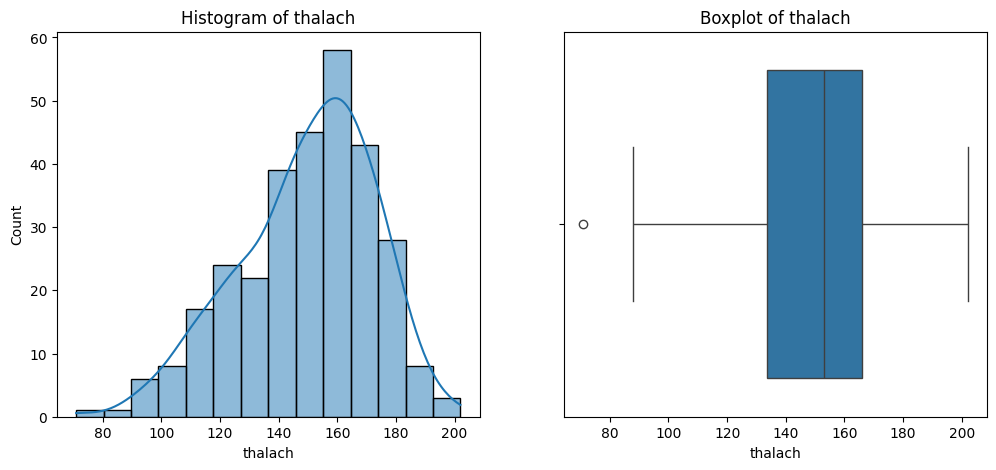

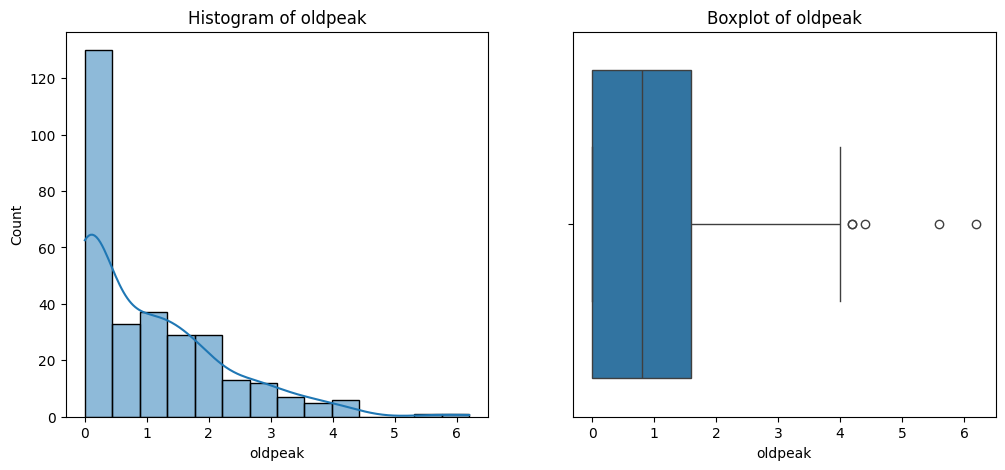

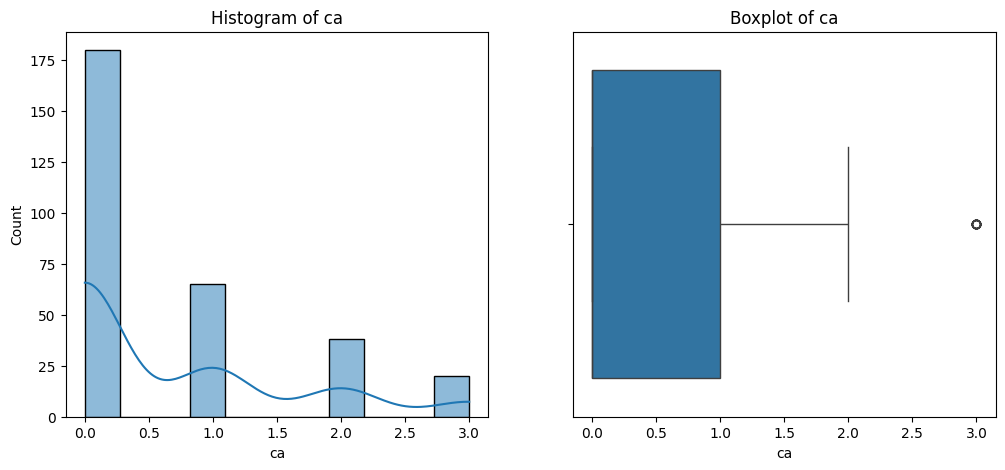

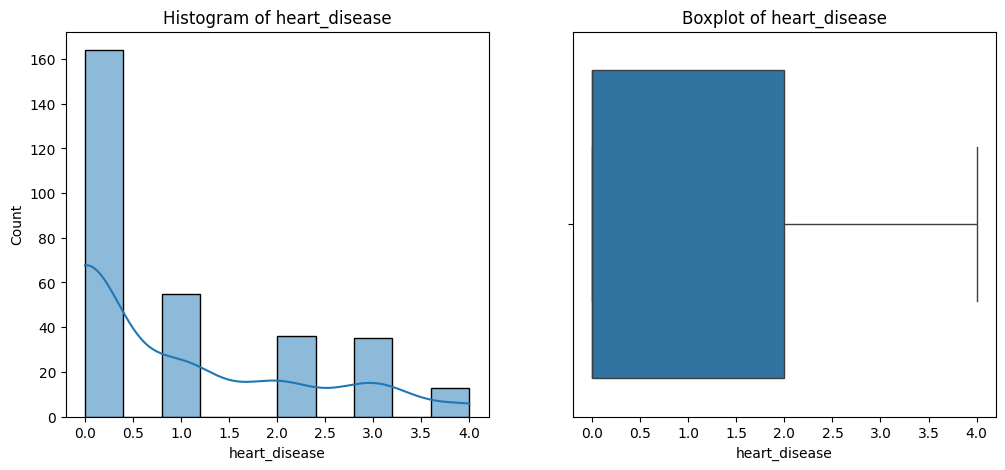

In [32]:
"""\
    Univariate analysis comparing the histograms of numerical features with their box plots to visualize how they are distributed and also to check skewness
    The for loops iterates through the dataframe and returns histogram and box plots visualizations of columns with type number"""

numerical_columns = heart_data_df.select_dtypes(include=np.number).columns
for col in numerical_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(heart_data_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=heart_data_df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()


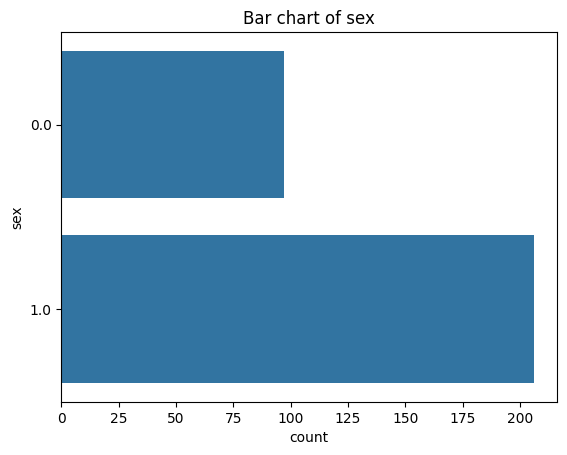

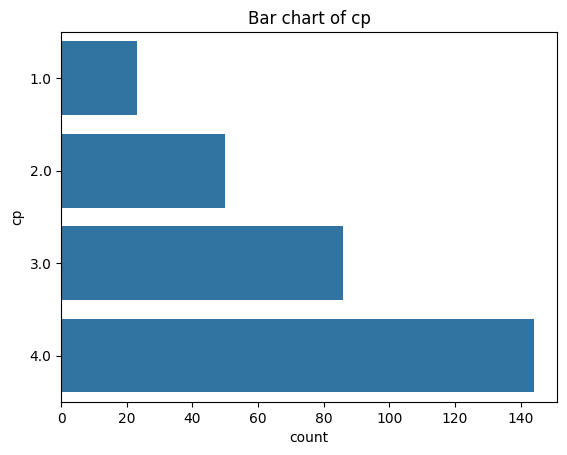

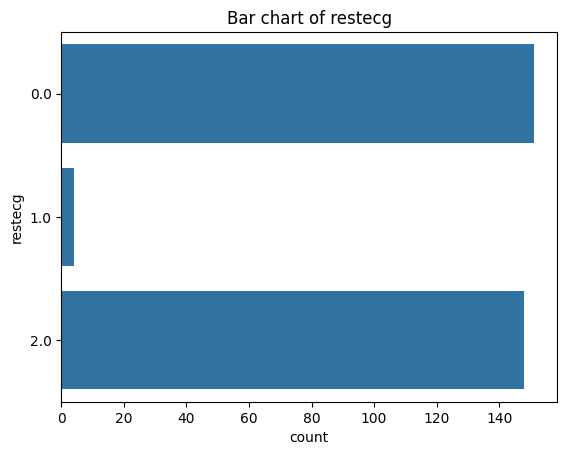

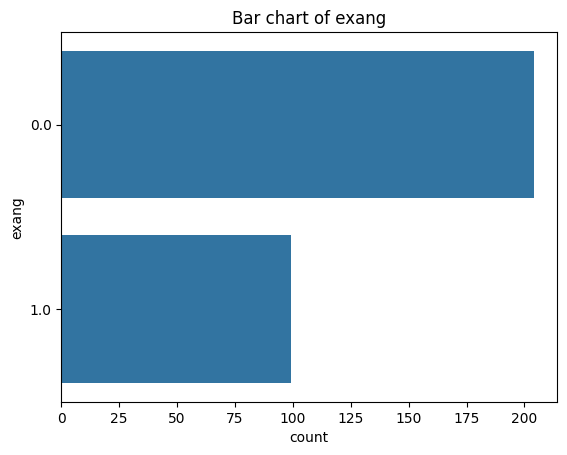

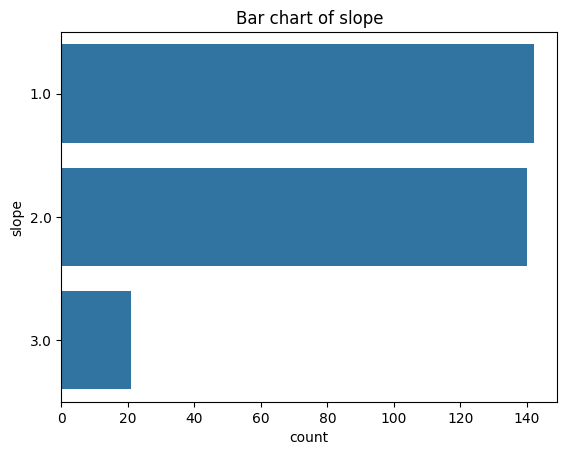

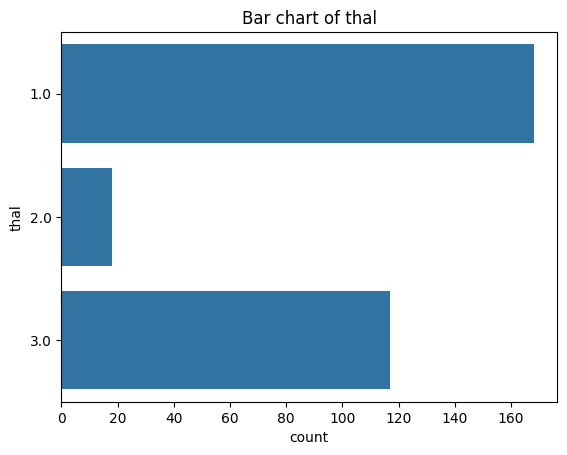

In [33]:
"""\
    Univariate analysis of categorical features
    Visualize categorical columns using bar charts"""

categorical_columns = heart_data_df.select_dtypes(include='category')
for col in categorical_columns:
    sns.countplot(y=heart_data_df[col])
    plt.title(f'Bar chart of {col}')
    plt.show()


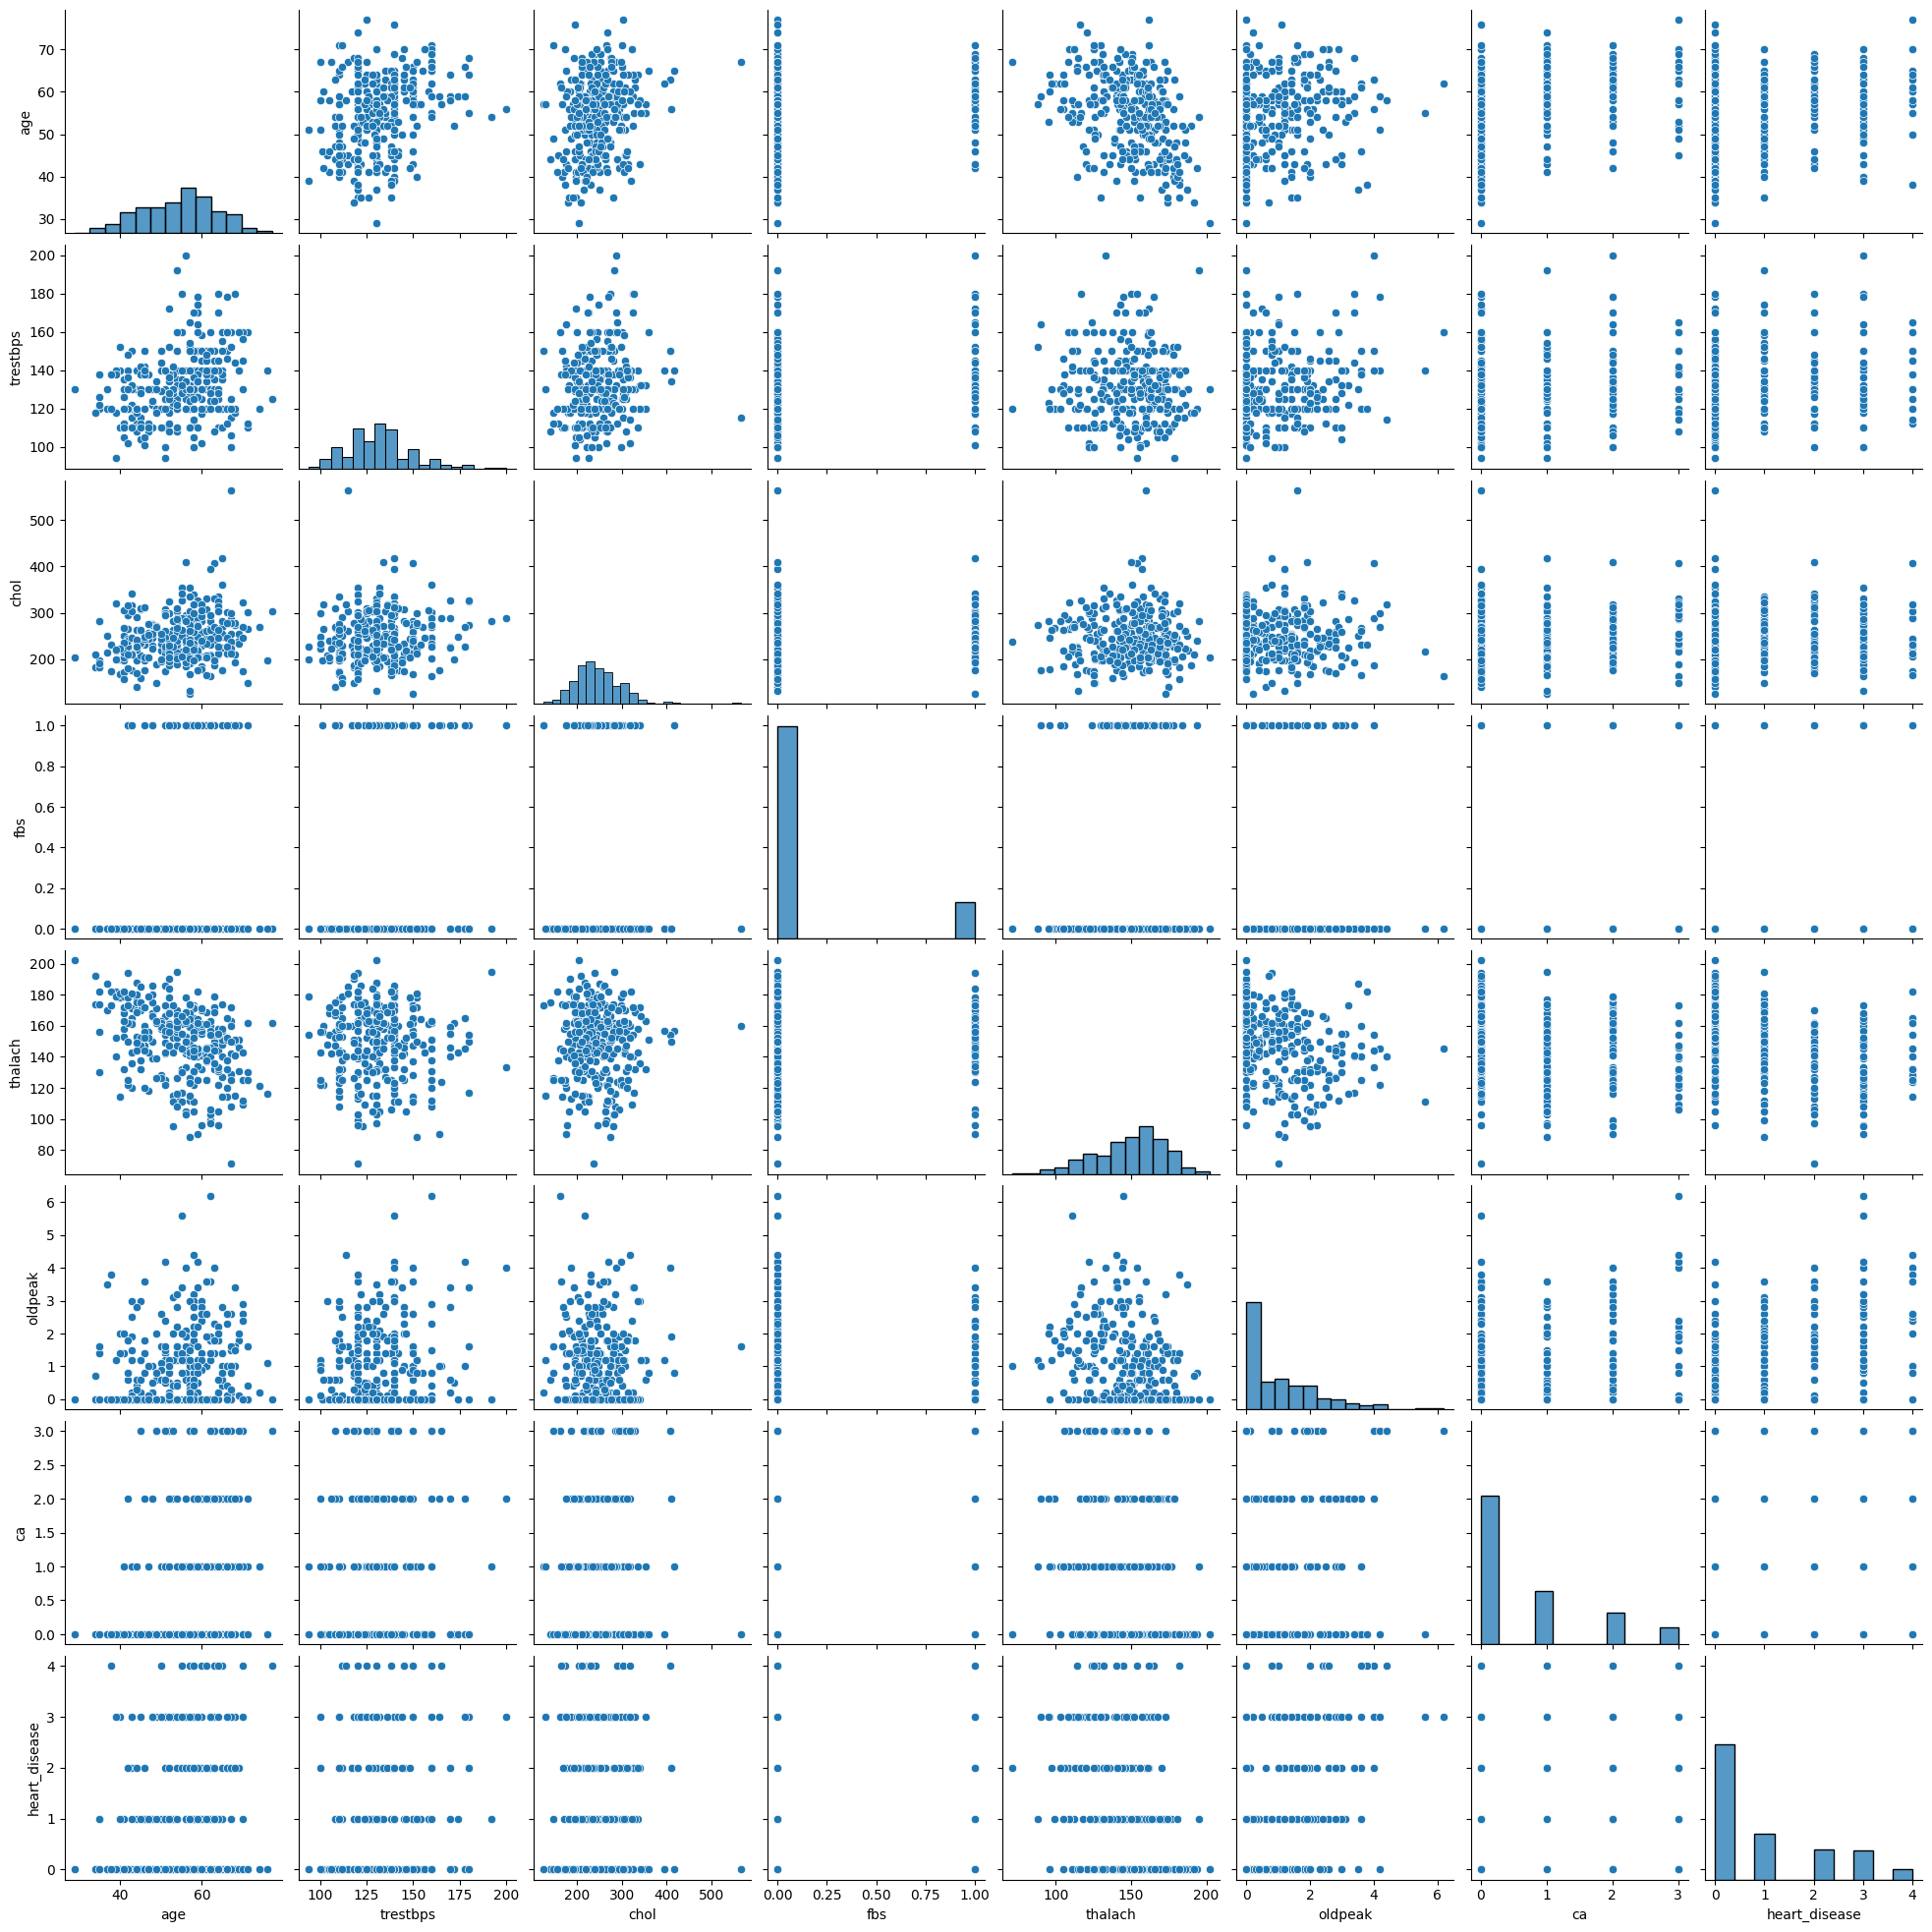

In [34]:
"""\
    Bivariate analysis using pairplotting"""

sns.pairplot(heart_data_df[numerical_columns])
plt.show()



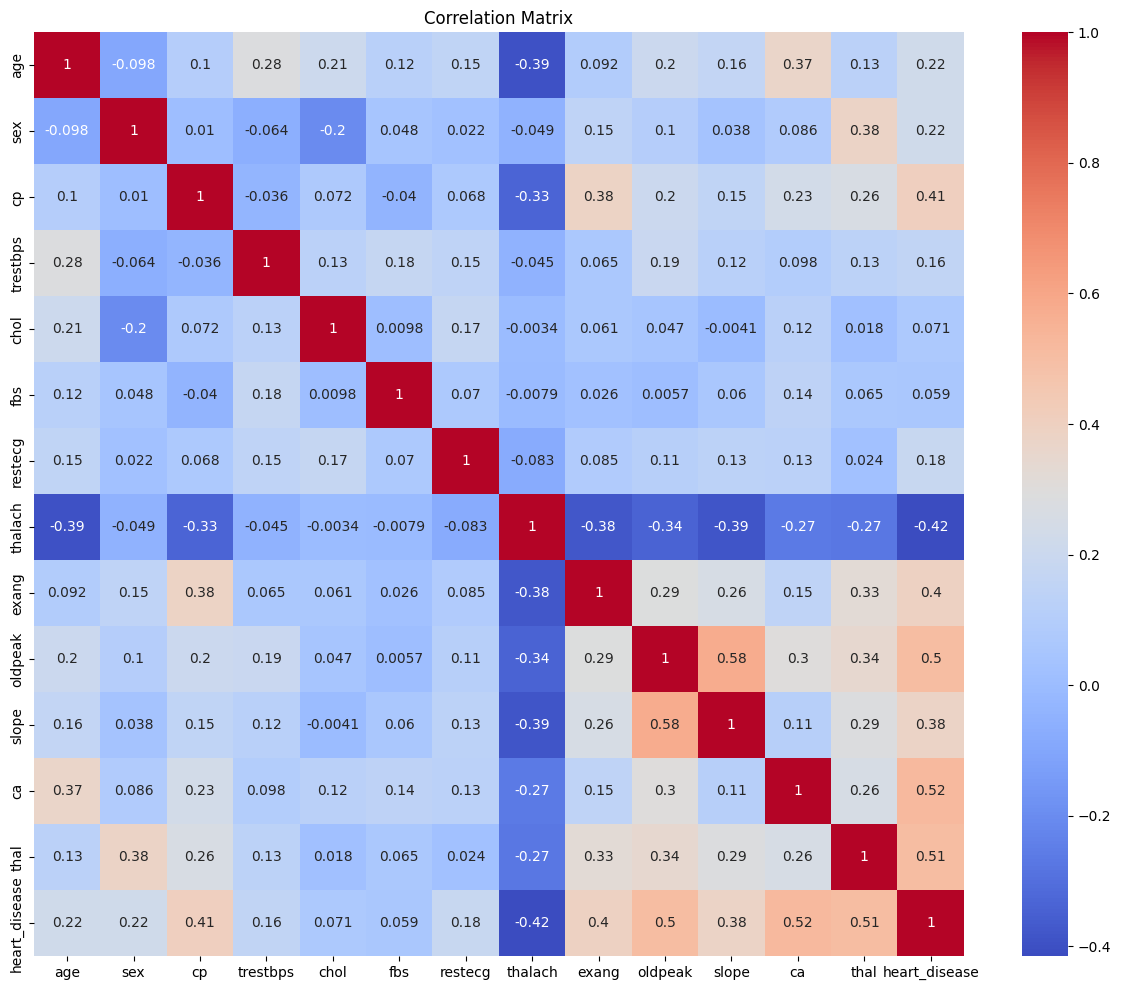

In [ ]:
"""\
    Checking the correlation between pairs of features in order to visualize relationships between them"""

correlation_matrix = heart_data_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



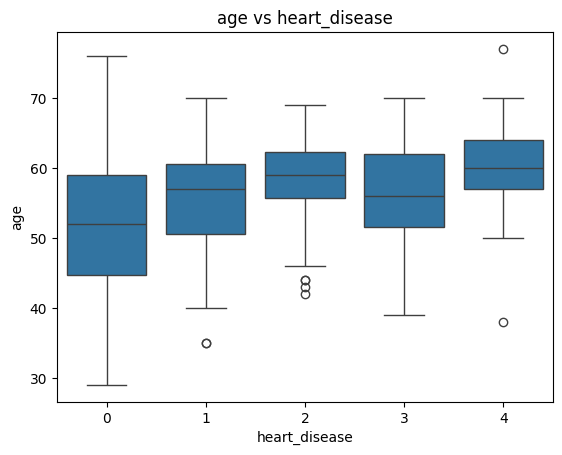

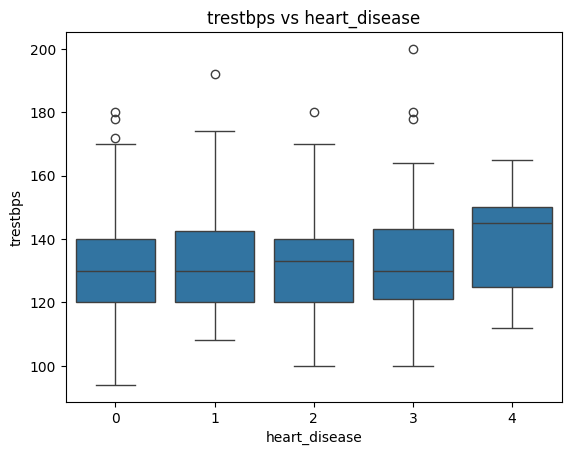

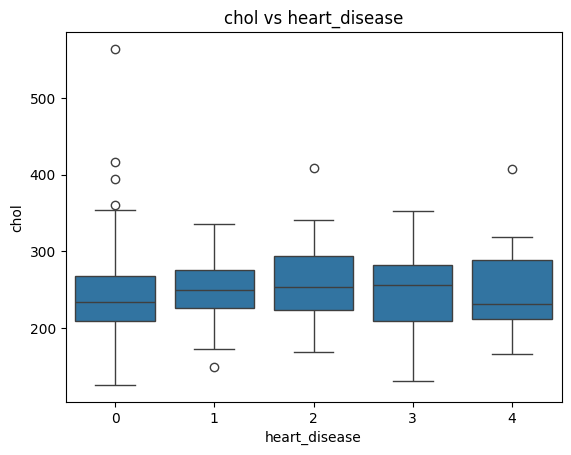

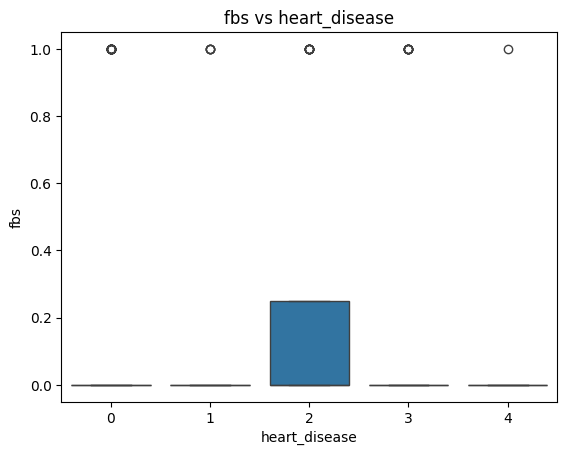

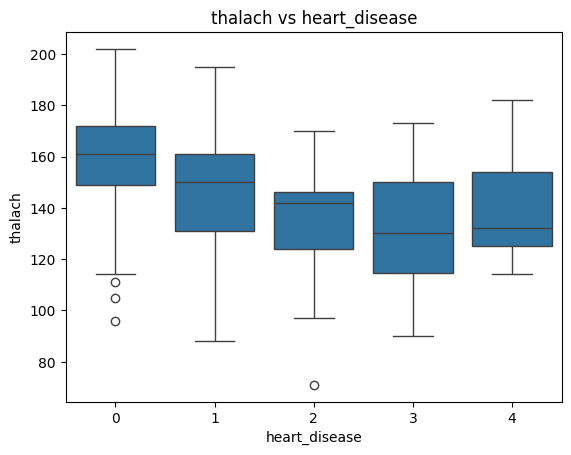

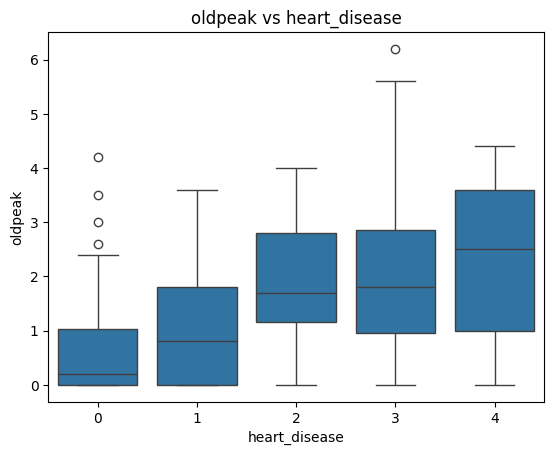

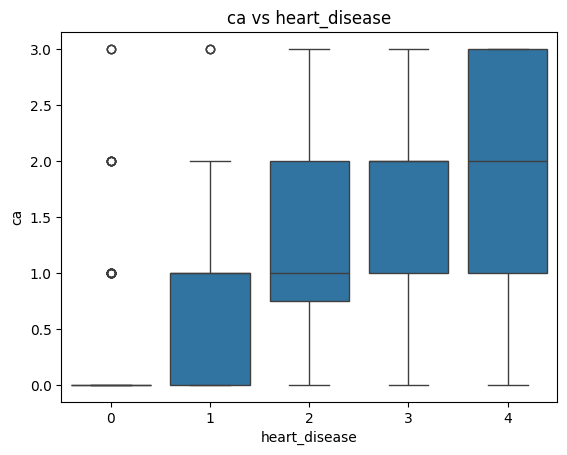

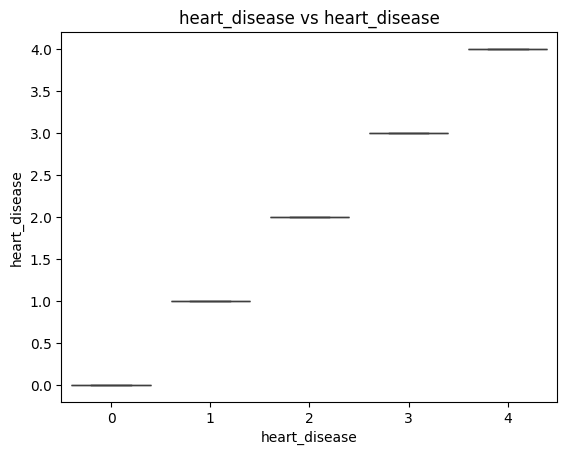

In [47]:
"""\
    Plotting features against the target which in this case is the prediction of presence of absence of heart disease"""

target = 'heart_disease' 
for col in numerical_columns:
    sns.boxplot(x=heart_data_df[target], y=heart_data_df[col])
    plt.title(f'{col} vs {target}')
    plt.show()


In [ ]:
"""Comparing the frequencies of occurrence of heart disease among the sexes expressed as percentages"""

cat1, cat2 = 'sex', 'heart_disease'  
print(pd.crosstab(heart_data_df[cat1], heart_data_df[cat2], normalize='index')*100) 


heart_disease          0          1          2          3         4
sex                                                                
0.0            74.226804   9.278351   7.216495   7.216495  2.061856
1.0            44.660194  22.330097  14.077670  13.592233  5.339806


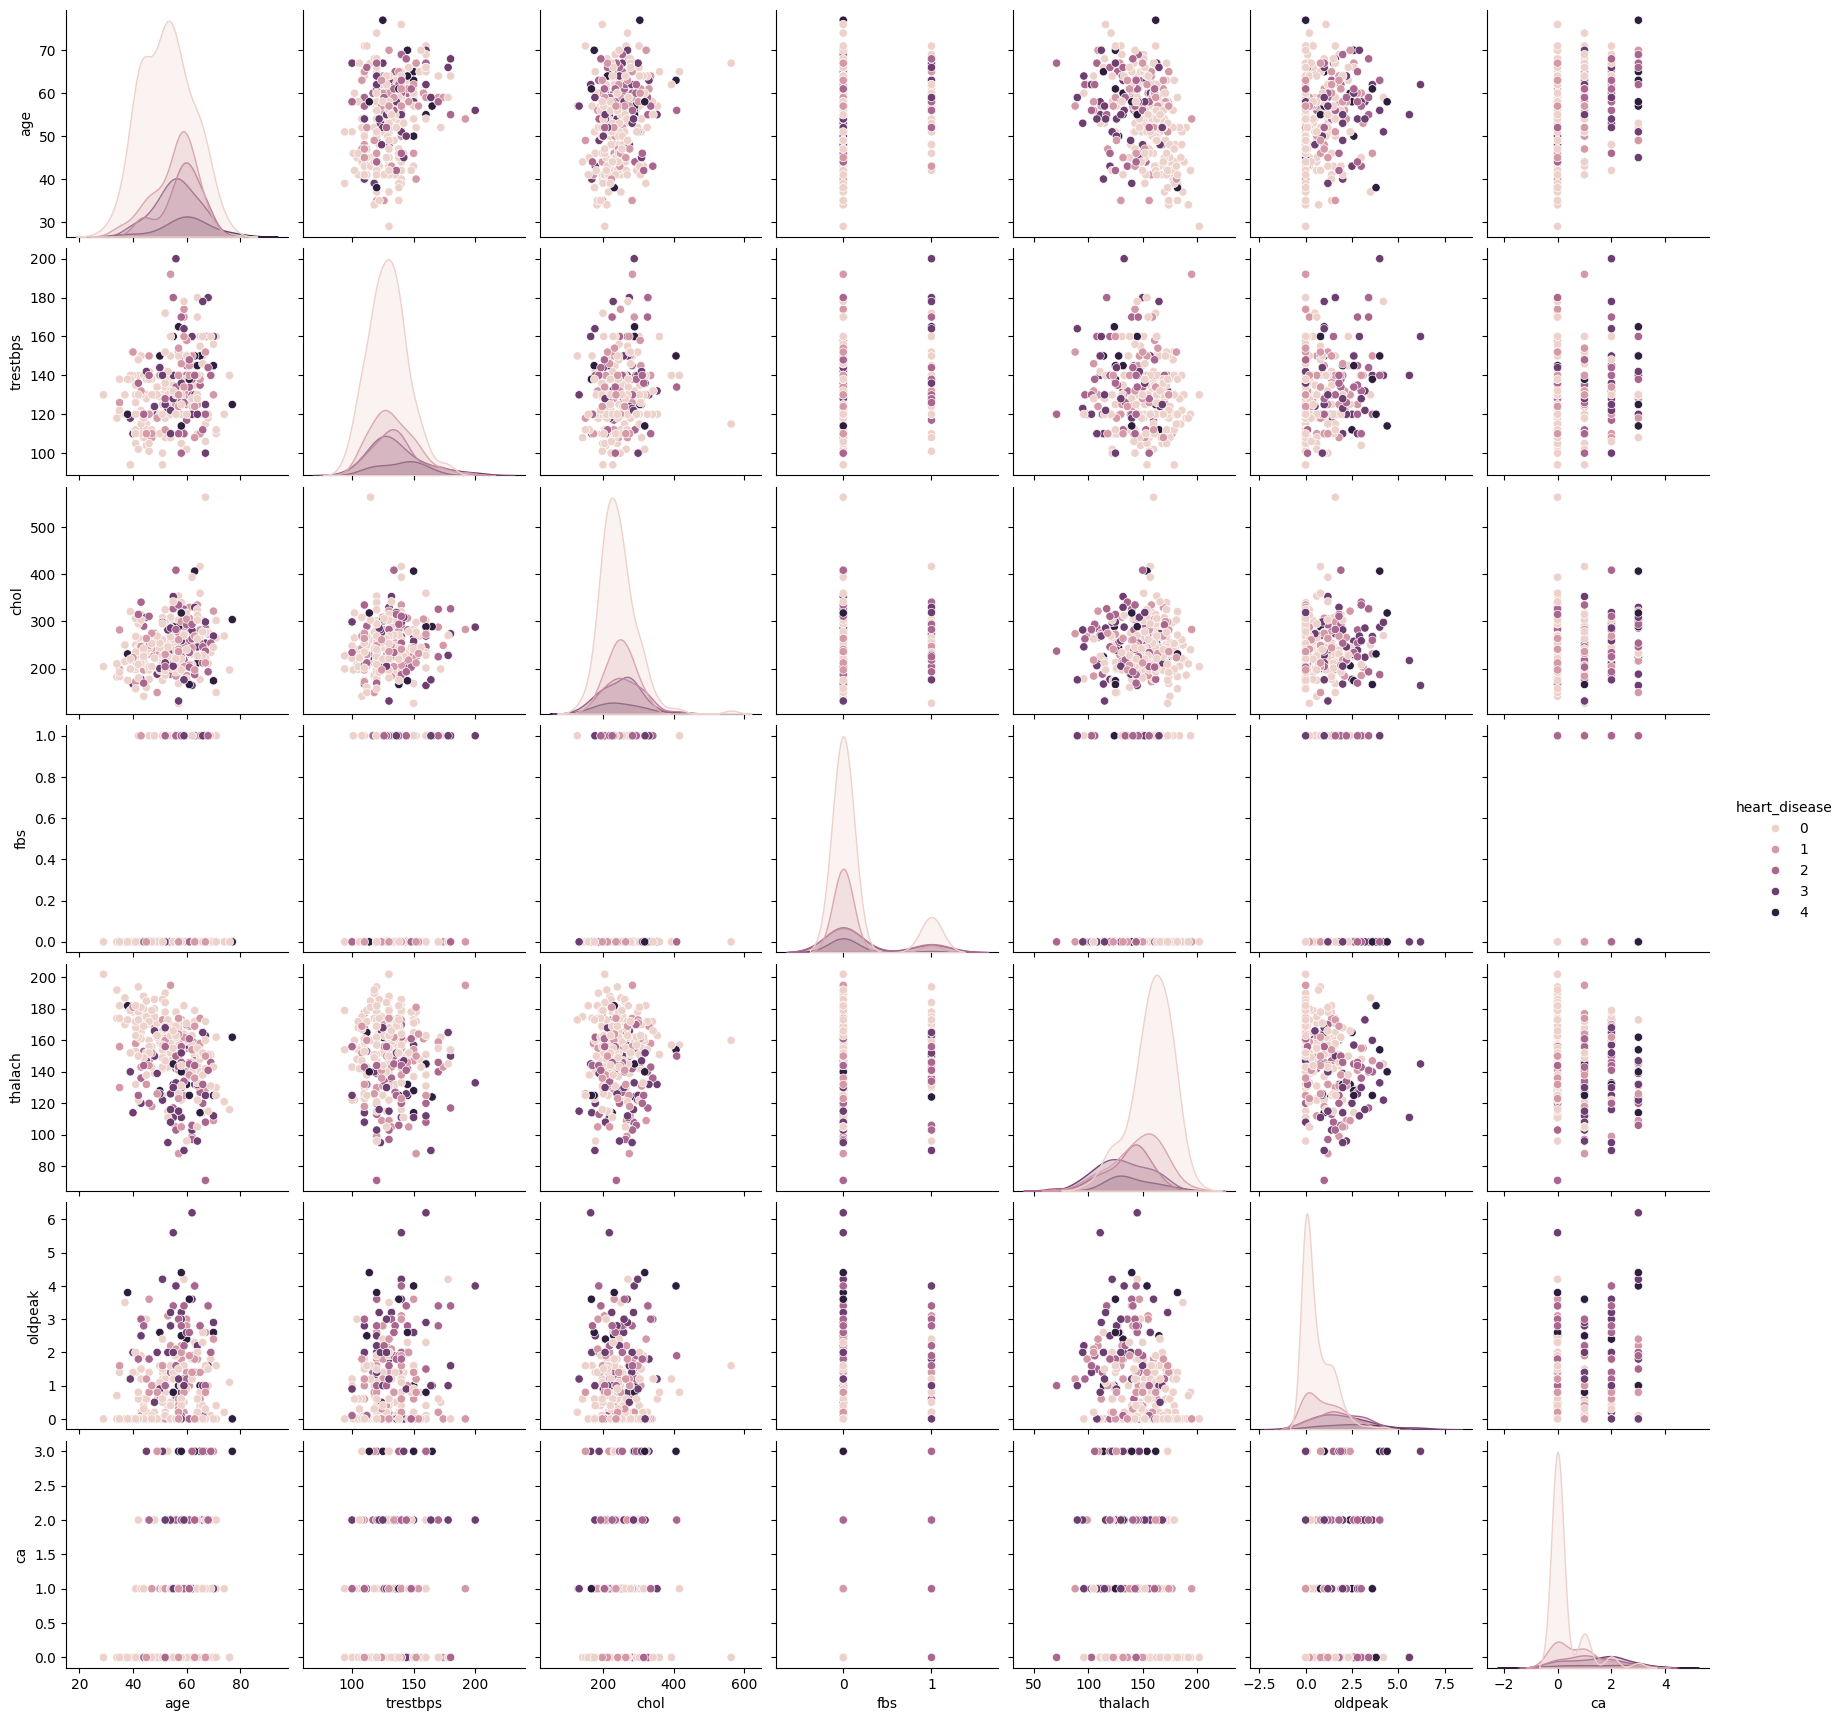

In [35]:
"""\
    Multivariate analysis between pairs of features and the target feature which is the occurence of heart disease"""

sns.pairplot(heart_data_df, hue='heart_disease')  
plt.show()


In [13]:

cat1, cat2 = 'sex', 'heart_disease'  
print(pd.crosstab(heart_data_df[cat1], heart_data_df[cat2], normalize='index')*100)


heart_disease          0          1          2          3         4
sex                                                                
0.0            74.226804   9.278351   7.216495   7.216495  2.061856
1.0            44.660194  22.330097  14.077670  13.592233  5.339806
